> As the number of attributes becomes large, exploratory analysis of the all the predictors may be infeasible and concentrating on those with strong relationships with the outcome may be an effective triaging strategy. 

In [2]:
library(AppliedPredictiveModeling)
data(solubility)

In [2]:
ls()

[1] "solTestX"       "solTestXtrans"  "solTestY"       "solTrainX"     
[5] "solTrainXtrans" "solTrainY"

In [4]:
str(solTrainXtrans)
str(solTrainY)

'data.frame':	951 obs. of  228 variables:
 $ FP001            : int  0 0 1 0 0 1 0 1 1 1 ...
 $ FP002            : int  1 1 1 0 0 0 1 0 0 1 ...
 $ FP003            : int  0 0 1 1 1 1 0 1 1 1 ...
 $ FP004            : int  0 1 1 0 1 1 1 1 1 1 ...
 $ FP005            : int  1 1 1 0 1 0 1 0 0 1 ...
 $ FP006            : int  0 1 0 0 1 0 0 0 1 1 ...
 $ FP007            : int  0 1 0 1 0 0 0 1 1 1 ...
 $ FP008            : int  1 1 1 0 0 0 1 0 0 0 ...
 $ FP009            : int  0 0 0 0 1 1 1 0 1 0 ...
 $ FP010            : int  0 0 1 0 0 0 0 0 0 0 ...
 $ FP011            : int  0 1 0 0 0 0 0 0 1 0 ...
 $ FP012            : int  0 0 0 0 0 1 0 1 0 0 ...
 $ FP013            : int  0 0 0 0 1 0 1 0 0 0 ...
 $ FP014            : int  0 0 0 0 0 0 1 0 0 0 ...
 $ FP015            : int  1 1 1 1 1 1 1 1 1 1 ...
 $ FP016            : int  0 1 0 0 1 1 0 1 0 0 ...
 $ FP017            : int  0 0 1 1 0 0 0 0 1 1 ...
 $ FP018            : int  0 1 0 0 0 0 0 0 0 0 ...
 $ FP019            : int  1 0 0 0 1 0 1

NULL

 num [1:951] -3.97 -3.98 -3.99 -4 -4.06 -4.08 -4.08 -4.1 -4.1 -4.11 ...


In [5]:
cor(solTrainXtrans$NumCarbon,solTrainY)

[1] -0.6067917

`Numeric Outcomes`

[A worked example: evaluating the relationship between two hormones](http://content.csbs.utah.edu/~rogers/datanal/labprj/bootstrap/index.html)

> 如果变量之间近线性或者曲线相关，那么使用Spearman相关系数更加有效

In [17]:
#Spearman Rank Correlation
# cor(solTrainX$NumCarbon,solTrainY)
cor.test(solTrainX$NumCarbon,solTrainY, method="pearson")
cor.test(solTrainX$NumCarbon,solTrainY, method="spearman")


	Pearson's product-moment correlation

data:  solTrainX$NumCarbon and solTrainY
t = -22.091, df = 949, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.6232429 -0.5391645
sample estimates:
       cor 
-0.5827611 


Warning message in cor.test.default(solTrainX$NumCarbon, solTrainY, method = "spearman"):
"Cannot compute exact p-value with ties"


	Spearman's rank correlation rho

data:  solTrainX$NumCarbon and solTrainY
S = 239900000, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.6735911 


In [4]:
trn_X <- solTrainXtrans
trn_y <- solTrainY

trn <- cbind(solTrainXtrans,solTrainY)
head(trn)

,FP001,FP002,FP003,FP004,FP005,FP006,FP007,FP008,FP009,FP010,...,NumNitrogen,NumOxygen,NumSulfer,NumChlorine,NumHalogen,NumRings,HydrophilicFactor,SurfaceArea1,SurfaceArea2,solTrainY
661,0,1,0,0,1,0,0,1,0,0,...,0.5848146,0.0000000,0.000,0.0000000,0.0000000,1.3862944,-1.60654181,6.812456,6.812456,-3.97
662,0,1,0,1,1,1,1,1,0,0,...,0.6423550,0.6931472,0.375,0.0000000,0.0000000,1.6094379,-0.44133043,9.753834,12.029604,-3.98
663,1,1,1,1,1,0,0,1,0,1,...,0.0000000,1.0986123,0.000,0.0000000,0.0000000,0.6931472,-0.38485910,8.245324,8.245324,-3.99
665,0,0,1,0,0,0,1,0,0,0,...,0.0000000,0.0000000,0.000,0.0000000,0.0000000,0.6931472,-2.37347220,0.000000,0.000000,-4.00
668,0,0,1,1,1,1,0,0,1,0,...,0.6943345,0.0000000,0.000,0.3750000,0.3750000,0.6931472,-0.07098726,9.913535,9.913535,-4.06
669,1,0,1,1,0,0,0,0,1,0,...,0.4568260,0.6931472,0.375,0.4444444,0.4444444,0.0000000,-0.94925327,5.999109,9.123359,-4.08


&#x1F4A1;`computing`

In [2]:
fp_cols <- grepl("FP",names(solTrainXtrans))
numeric_cols <- names(solTrainXtrans)[!fp_cols]

corr_info <- apply(solTrainXtrans[,numeric_cols],2,FUN = function(x,y) cor(x,y), y=solTrainY)

In [5]:
col_fp <- grepl("FP",names(trn_X))
col_num <- names(trn_X)[!col_fp]

cor_info <- apply(trn_X[,col_num],2,FUN = function(x,y) cor(x,y),y=trn_y)
head(cor_info)

MolWeight     NumAtoms NumNonHAtoms     NumBonds NumNonHBonds NumMultBonds 
  -0.6585284   -0.4358113   -0.5836236   -0.4590395   -0.5851968   -0.4804159

In [6]:
cor_rank_info <- apply(trn_X[,col_num],2,
                       FUN = function(x,y) cor(x,y,method = "spearman"),y=trn_y)
head(cor_rank_info)

MolWeight     NumAtoms NumNonHAtoms     NumBonds NumNonHBonds NumMultBonds 
  -0.6852988   -0.5198317   -0.6296540   -0.5483985   -0.6322837   -0.4797135

In [10]:
df_cor <- data.frame(predictors = names(cor_info),
                   pearson = cor_info,
                   spearman = cor_rank_info)
head(df_cor)

,predictors,pearson,spearman
MolWeight,MolWeight,-0.6585284,-0.6852988
NumAtoms,NumAtoms,-0.4358113,-0.5198317
NumNonHAtoms,NumNonHAtoms,-0.5836236,-0.6296540
NumBonds,NumBonds,-0.4590395,-0.5483985
NumNonHBonds,NumNonHBonds,-0.5851968,-0.6322837
NumMultBonds,NumMultBonds,-0.4804159,-0.4797135


`LOESS  Locally Weighted Regression`

In [5]:
smoother <- loess(solTrainY~solTrainXtrans$NumCarbon)
smoother

Call:
loess(formula = solTrainY ~ solTrainXtrans$NumCarbon)

Number of Observations: 951 
Equivalent Number of Parameters: 5.3 
Residual Standard Error: 1.548 

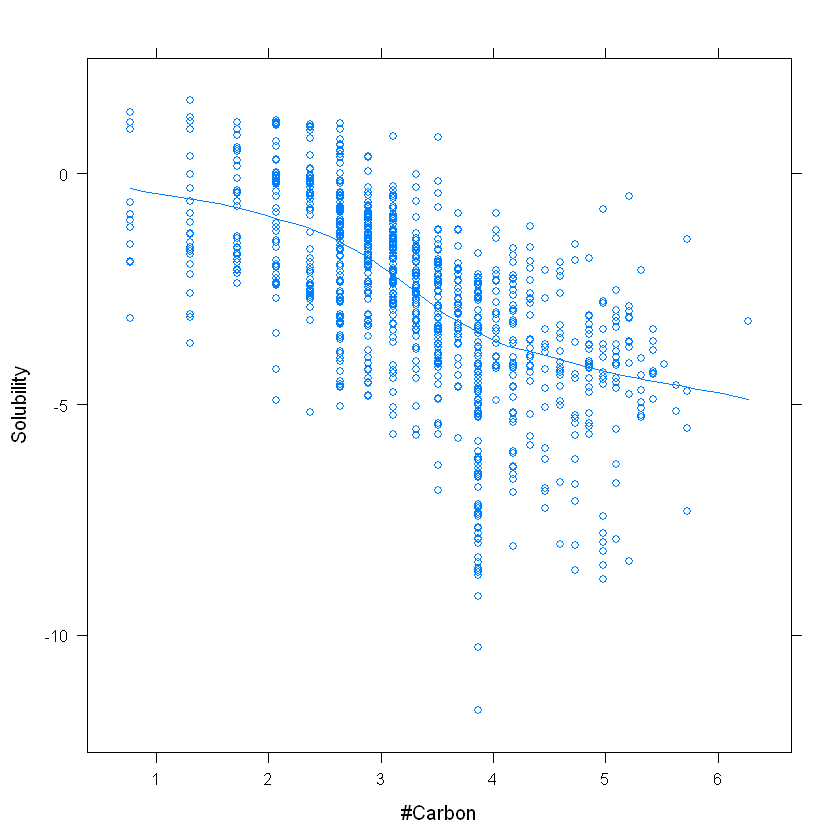

In [6]:
library(lattice)
xyplot(solTrainY~solTrainXtrans$NumCarbon,
       type=c("p","smooth"),
       xlab="#Carbon",
       ylab="Solubility")

In [11]:
library(caret)
varimp_loess <- filterVarImp(x=trn_X[,col_num],
                            y=trn_y,nonpara=T)
head(varimp_loess)
names(varimp_loess)[1] <- "smoother"

Loading required package: lattice
Loading required package: ggplot2


,Overall
MolWeight,0.4443931
NumAtoms,0.1899315
NumNonHAtoms,0.3406166
NumBonds,0.2107173
NumNonHBonds,0.3424552
NumMultBonds,0.2307995


In [13]:
# install.packages("minerva")
library(minerva)
mic_info <- mine(trn_X[,col_num],trn_y)
names(mic_info)
head(mic_info$MIC)

[1] "MIC"   "MAS"   "MEV"   "MCN"   "MICR2" "GMIC"  "TIC"

,Y
MolWeight,0.4679277
NumAtoms,0.2896815
NumNonHAtoms,0.3947092
NumBonds,0.3268683
NumNonHBonds,0.3919627
NumMultBonds,0.2792600


In [41]:
## The Relief values for regression can be computed using the CORElearn

# SolContPred <- solTrainXtrans[, !grepl("FP", names(solTrainXtrans))]
# numSolPred <- ncol(SolContPred)
# SolContPred$Sol <- solTrainY
# library(CORElearn)

ReliefF <- CORElearn::attrEval(solTrainY~.,data=trn[,col_num],estimator = "RReliefFequalK")
ReliefF <- data.frame(predictors=names(ReliefF),relief=ReliefF)
head(ReliefF)

,predictors,relief
MolWeight,MolWeight,0.084734907
NumAtoms,NumAtoms,0.008618179
NumNonHAtoms,NumNonHAtoms,0.036433860
NumBonds,NumBonds,0.002422405
NumNonHBonds,NumNonHBonds,0.035619406
NumMultBonds,NumMultBonds,0.051554380


In [18]:
var_summary <- cbind(df_cor,mic_info$MIC,varimp_loess,ReliefF)
head(var_summary)

,predictors,pearson,spearman,Y,smoother,predictor,relief
MolWeight,MolWeight,-0.6585284,-0.6852988,0.4679277,0.4443931,MolWeight,0.084734907
NumAtoms,NumAtoms,-0.4358113,-0.5198317,0.2896815,0.1899315,NumAtoms,0.008618179
NumNonHAtoms,NumNonHAtoms,-0.5836236,-0.6296540,0.3947092,0.3406166,NumNonHAtoms,0.036433860
NumBonds,NumBonds,-0.4590395,-0.5483985,0.3268683,0.2107173,NumBonds,0.002422405
NumNonHBonds,NumNonHBonds,-0.5851968,-0.6322837,0.3919627,0.3424552,NumNonHBonds,0.035619406
NumMultBonds,NumMultBonds,-0.4804159,-0.4797135,0.2792600,0.2307995,NumMultBonds,0.051554380


In [19]:
names(var_summary)[4] <- "MIC"
var_summary <- var_summary[,-c(6)]

In [29]:
head(var_summary)
write.csv(var_summary,"var_summary.csv")

,predictors,pearson,spearman,MIC,smoother,relief,pearson_abs,spearman_abs,group
MolWeight,MolWeight,-0.6585284,-0.6852988,0.4679277,0.4443931,0.084734907,0.6585284,0.6852988,Other
NumAtoms,NumAtoms,-0.4358113,-0.5198317,0.2896815,0.1899315,0.008618179,0.4358113,0.5198317,Other
NumNonHAtoms,NumNonHAtoms,-0.5836236,-0.6296540,0.3947092,0.3406166,0.036433860,0.5836236,0.6296540,Other
NumBonds,NumBonds,-0.4590395,-0.5483985,0.3268683,0.2107173,0.002422405,0.4590395,0.5483985,Other
NumNonHBonds,NumNonHBonds,-0.5851968,-0.6322837,0.3919627,0.3424552,0.035619406,0.5851968,0.6322837,Other
NumMultBonds,NumMultBonds,-0.4804159,-0.4797135,0.2792600,0.2307995,0.051554380,0.4804159,0.4797135,Other


In [24]:
var_summary$pearson_abs <- abs(var_summary$pearson)
var_summary$spearman_abs <- abs(var_summary$spearman)
var_summary$group <- "Other"
var_summary$group[grepl("Surface",var_summary$predictors)] <- "Surface"

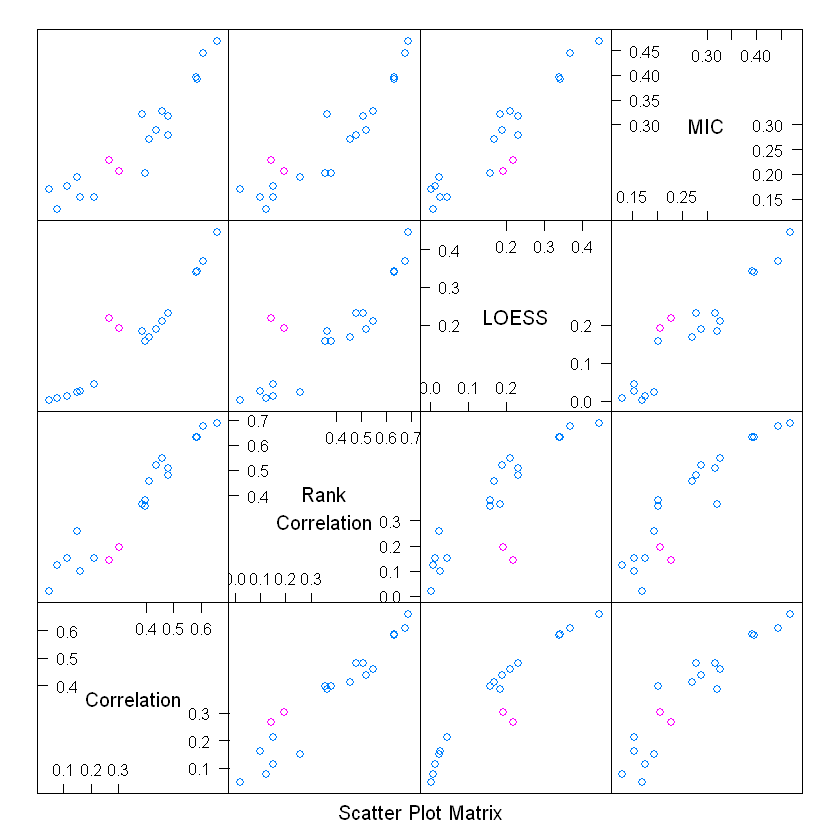

In [30]:
splom(~var_summary[,c(7,8,5,4)],
     groups=var_summary$group,
     varnames=c("Correlation", "Rank\nCorrelation","LOESS","MIC"))

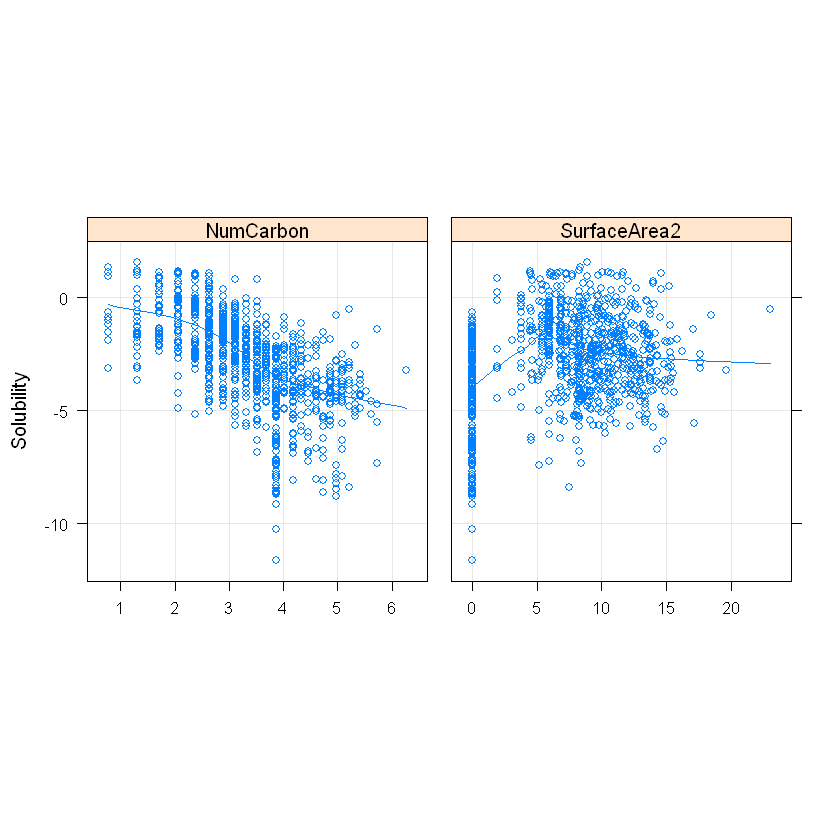

In [60]:
featurePlot(solTrainXtrans[,c("NumCarbon","SurfaceArea2")],
           solTrainY,between=list(x=1),
           type=c("g","p","smooth"),
           df=3,aspect=1,labels=c("","Solubility"))

In [13]:
#for  categorical vars
t.test(solTrainY~solTrainXtrans$FP044)


	Welch Two Sample t-test

data:  solTrainY by solTrainXtrans$FP044
t = 15.198, df = 61.891, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 3.569300 4.650437
sample estimates:
mean in group 0 mean in group 1 
      -2.472237       -6.582105 


In [15]:
str(t.test(solTrainY~solTrainXtrans$FP044))

List of 9
 $ statistic  : Named num 15.2
  ..- attr(*, "names")= chr "t"
 $ parameter  : Named num 61.9
  ..- attr(*, "names")= chr "df"
 $ p.value    : num 1.46e-22
 $ conf.int   : num [1:2] 3.57 4.65
  ..- attr(*, "conf.level")= num 0.95
 $ estimate   : Named num [1:2] -2.47 -6.58
  ..- attr(*, "names")= chr [1:2] "mean in group 0" "mean in group 1"
 $ null.value : Named num 0
  ..- attr(*, "names")= chr "difference in means"
 $ alternative: chr "two.sided"
 $ method     : chr "Welch Two Sample t-test"
 $ data.name  : chr "solTrainY by solTrainXtrans$FP044"
 - attr(*, "class")= chr "htest"


In [55]:
getTstats <- function(x,y)
    {
    tTest <- t.test(y~x)[c("statistic","p.value","estimate")]
    unlist(tTest)
}

t_info <- apply(trn_X[,col_fp],MARGIN = 2,FUN = getTstats,y=trn_y)
t_info <- as.data.frame(t(t_info))
names(t_info) <- c("t.Statistic", "t.test_p.value", "mean0", "mean1")
t_info$diff <- t_info$mean1-t_info$mean0

head(t_info)

,t.Statistic,t.test_p.value,mean0,mean1,diff
FP001,-4.022040,6.287404e-05,-2.978465,-2.451471,0.5269935
FP002,10.286727,1.351580e-23,-2.021347,-3.313860,-1.2925126
FP003,-2.036442,4.198619e-02,-2.832164,-2.571855,0.2603088
FP004,-4.948958,9.551772e-07,-3.128380,-2.427428,0.7009517
FP005,10.282475,1.576549e-23,-1.969000,-3.262722,-1.2937223
FP006,-7.875838,9.287835e-15,-3.109421,-2.133832,0.9755890


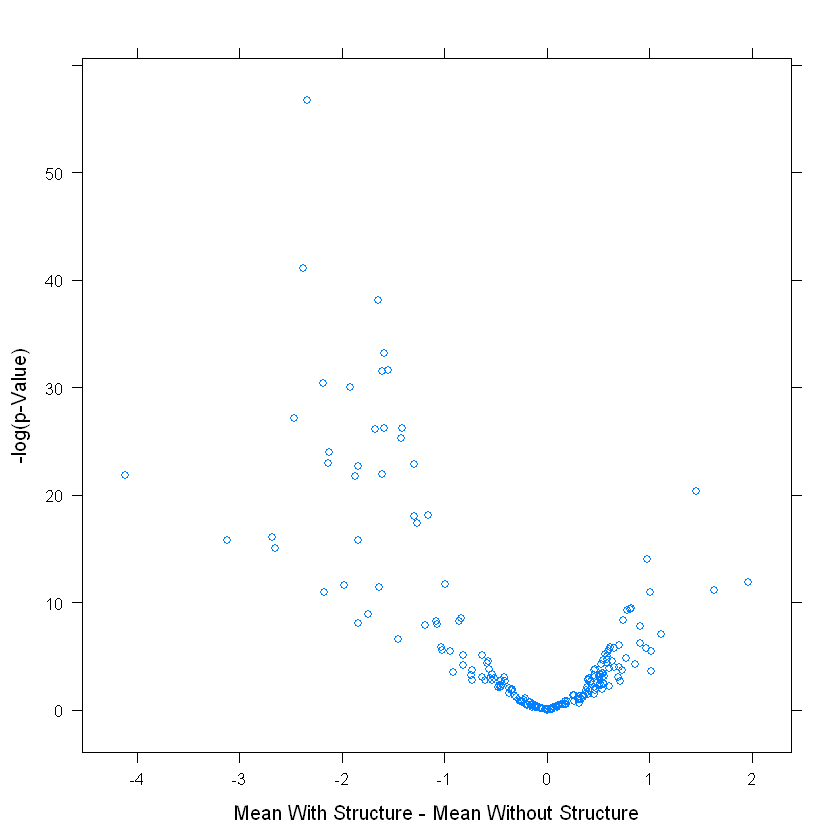

In [56]:
xyplot(-log10(t.test_p.value)~diff,
      data=t_info,
      xlab="Mean With Structure - Mean Without Structure",
      ylab="-log(p-Value)",
      type="p")

> 决定每个二进制预测变量之间关系的最直接的方法是检测每类中结构变量均值是否有差异。

> 比较两组均值最自然地方法是标准t统计量，期本质上就是一个信号和噪音的比例（均值差除以两组方差的函数）。检验p值对应的零假设是"两组间没有显著差异"。该统计量建立在数据是正态分布的假设上。如果数据分布不符合该假设，或许可以使用其他更和更合适的方法（如Wilcoxon秩和检验）

> 哪个预测变量更重要取决于具体环境和数据。如果信号足够大，模型可能可以克服噪声的干扰，在其他情况下，更小但是更精确的差别可能给出更好的表现。

> 当预测变量对应的类多于2个是，可以用方差分析ANOVA的方法探索预测变量的统计显著性，然而，如果检测结果表明各类别对应的均值存在不同，下一步要做的事探索哪里不同。处于此原因，我们需要将该分类变量准化为几个0-1虚拟变量然后用前面的方法决定每一类和结果变量的关联。

`Categorical`

In [63]:
str(segmentationData)

'data.frame':	2019 obs. of  61 variables:
 $ Cell                   : int  207827637 207932307 207932463 207932470 207932455 207827656 207827659 207827661 207932479 207932480 ...
 $ Case                   : Factor w/ 2 levels "Test","Train": 1 2 2 2 1 1 1 1 1 1 ...
 $ Class                  : Factor w/ 2 levels "PS","WS": 1 1 2 1 1 2 2 1 2 2 ...
 $ AngleCh1               : num  143.25 133.75 106.65 69.15 2.89 ...
 $ AreaCh1                : int  185 819 431 298 285 172 177 251 495 384 ...
 $ AvgIntenCh1            : num  15.7 31.9 28 19.5 24.3 ...
 $ AvgIntenCh2            : num  4.95 206.88 116.32 102.29 112.42 ...
 $ AvgIntenCh3            : num  9.55 69.92 63.94 28.22 20.47 ...
 $ AvgIntenCh4            : num  2.21 164.15 106.7 31.03 40.58 ...
 $ ConvexHullAreaRatioCh1 : num  1.12 1.26 1.05 1.2 1.11 ...
 $ ConvexHullPerimRatioCh1: num  0.92 0.797 0.935 0.866 0.957 ...
 $ DiffIntenDensityCh1    : num  29.5 31.9 32.5 26.7 31.6 ...
 $ DiffIntenDensityCh3    : num  13.8 43.1 36 22.9 21.

In [4]:
# library(caret)
data(segmentationData)
trn <- subset(segmentationData,Case=="Train")
trn$Case <- trn$Cell <- NULL

vld <- subset(segmentationData,Case=="Test")
vld$Case <- vld$Cell <- NULL

Loading required package: lattice
Loading required package: ggplot2


In [8]:
## auc
auc_info <- filterVarImp(x=trn[,-1],y=trn$Class)
auc_info$Predictor <- rownames(auc_info)
head(auc_info)

,PS,WS,Predictor
AngleCh1,0.5025967,0.5025967,AngleCh1
AreaCh1,0.5709170,0.5709170,AreaCh1
AvgIntenCh1,0.7662375,0.7662375,AvgIntenCh1
AvgIntenCh2,0.7866146,0.7866146,AvgIntenCh2
AvgIntenCh3,0.5214098,0.5214098,AvgIntenCh3
AvgIntenCh4,0.6473814,0.6473814,AvgIntenCh4


In [9]:
getTstats <- function(x,y)
    {
    tTest <- t.test(x~y)[c("statistic","p.value","estimate")]
    unlist(tTest)
}

tTest_info <- apply(trn[,-1],2,FUN = getTstats,y=trn$Class)
tTest_info <- as.data.frame(t(tTest_info))
names(tTest_info) <- c("t.Statistic", "t.test_p.value", "mean0", "mean1")
tTest_info$Predictor <- rownames(tTest_info)
head(tTest_info)

,t.Statistic,t.test_p.value,mean0,mean1,Predictor
AngleCh1,-0.2186985,8.269443e-01,90.86539,91.57148,AngleCh1
AreaCh1,-0.9316066,3.517830e-01,320.55189,332.92493,AreaCh1
AvgIntenCh1,-11.7540085,4.819837e-28,77.02212,214.69221,AvgIntenCh1
AvgIntenCh2,-16.0940082,2.530403e-50,132.44052,277.83973,AvgIntenCh2
AvgIntenCh3,-0.1475297,8.827553e-01,95.78766,96.71147,AvgIntenCh3
AvgIntenCh4,-6.2372500,7.976250e-10,116.82871,179.57968,AvgIntenCh4


In [10]:
## Fit a random forest model and get the importance scores
library(randomForest)
set.seed(791)
fit_rf <- randomForest(Class~.,data=trn,ntree=200,importance=T)

rf_info <- data.frame(RF=importance(fit_rf)[,"MeanDecreaseGini"],
                     Predictor = rownames(importance(fit_rf)))
head(rf_info)

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:ggplot2':

    margin



,RF,Predictor
AngleCh1,5.101970,AngleCh1
AreaCh1,4.493654,AreaCh1
AvgIntenCh1,17.914886,AvgIntenCh1
AvgIntenCh2,19.875244,AvgIntenCh2
AvgIntenCh3,5.371608,AvgIntenCh3
AvgIntenCh4,5.849948,AvgIntenCh4


`Relief`

In [1]:
library(CORElearn)
#http://lkm.fri.uni-lj.si/rmarko/papers/

In [12]:
set.seed(791)
Relief_info <- attrEval(Class~.,data=trn,estimator = "ReliefFequalK",ReliefIterations=50)
Relief_info <- data.frame(Relief=Relief_info,Predictor=names(Relief_info))
head(Relief_info)

,Relief,Predictor
AngleCh1,0.002287557,AngleCh1
AreaCh1,0.016041257,AreaCh1
AvgIntenCh1,0.071057681,AvgIntenCh1
AvgIntenCh2,0.150684824,AvgIntenCh2
AvgIntenCh3,0.018172519,AvgIntenCh3
AvgIntenCh4,-0.007167866,AvgIntenCh4


In [7]:
library(minerva)
set.seed(791)
MIC_info <- mine(x=trn[,-1],
                y=ifelse(trn$Class=="PS",1,0))$MIC
MIC_info <- data.frame(Predictor=rownames(MIC_info),
                      MIC = MIC_info[,1])
head(MIC_info)

,Predictor,MIC
AngleCh1,AngleCh1,0.1310570
AreaCh1,AreaCh1,0.1080839
AvgIntenCh1,AvgIntenCh1,0.2920461
AvgIntenCh2,AvgIntenCh2,0.3294846
AvgIntenCh3,AvgIntenCh3,0.1354438
AvgIntenCh4,AvgIntenCh4,0.1665450


In [16]:
list(auc_info,tTest_info,rf_info,Relief_info,MIC_info)[1]

,PS,WS,Predictor
AngleCh1,0.5025967,0.5025967,AngleCh1
AreaCh1,0.5709170,0.5709170,AreaCh1
AvgIntenCh1,0.7662375,0.7662375,AvgIntenCh1
AvgIntenCh2,0.7866146,0.7866146,AvgIntenCh2
AvgIntenCh3,0.5214098,0.5214098,AvgIntenCh3
AvgIntenCh4,0.6473814,0.6473814,AvgIntenCh4
ConvexHullAreaRatioCh1,0.7815519,0.7815519,ConvexHullAreaRatioCh1
ConvexHullPerimRatioCh1,0.7547844,0.7547844,ConvexHullPerimRatioCh1
DiffIntenDensityCh1,0.7161591,0.7161591,DiffIntenDensityCh1
DiffIntenDensityCh3,0.5427353,0.5427353,DiffIntenDensityCh3


In [17]:
#combine all scores
info_list <- list(tTest_info,rf_info,Relief_info,MIC_info)
rankings  <- auc_info

for (i in 1:4){
    rankings <- merge(rankings,info_list[i])
}

head(rankings)

Predictor,PS,WS,t.Statistic,t.test_p.value,mean0,mean1,RF,Relief,MIC
AngleCh1,0.5025967,0.5025967,-0.2186985,8.269443e-01,90.86539,91.57148,5.101970,0.002287557,0.1310570
AreaCh1,0.5709170,0.5709170,-0.9316066,3.517830e-01,320.55189,332.92493,4.493654,0.016041257,0.1080839
AvgIntenCh1,0.7662375,0.7662375,-11.7540085,4.819837e-28,77.02212,214.69221,17.914886,0.071057681,0.2920461
AvgIntenCh2,0.7866146,0.7866146,-16.0940082,2.530403e-50,132.44052,277.83973,19.875244,0.150684824,0.3294846
AvgIntenCh3,0.5214098,0.5214098,-0.1475297,8.827553e-01,95.78766,96.71147,5.371608,0.018172519,0.1354438
AvgIntenCh4,0.6473814,0.6473814,-6.2372500,7.976250e-10,116.82871,179.57968,5.849948,-0.007167866,0.1665450


In [20]:
rankings$channel <- "Channel 1"
rankings$channel[grepl("Ch2$",rankings$Predictor)] <- "Channel 2"
rankings$channel[grepl("Ch3$",rankings$Predictor)] <- "Channel 3"
rankings$channel[grepl("Ch4$",rankings$Predictor)] <- "Channel 4"

rankings$t.Statistic <- abs(rankings$t.Statistic)

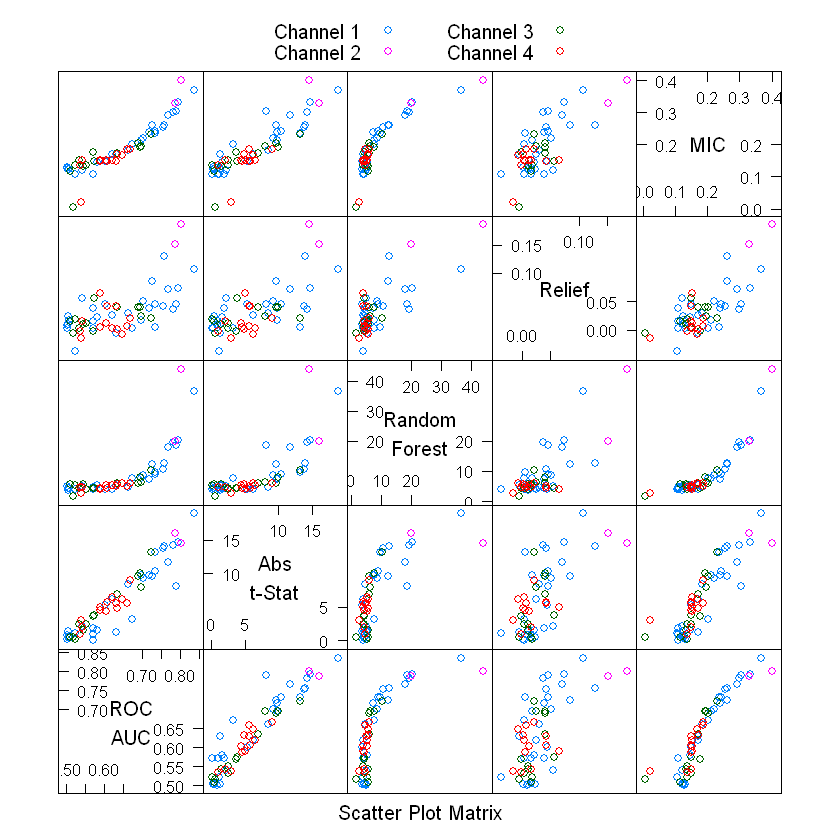

In [23]:
splom(~rankings[,c("PS", "t.Statistic", "RF", "Relief", "MIC")],
     groups = rankings$channel,
     varnames=c("ROC\nAUC", "Abs\nt-Stat", "Random\nForest", "Relief", "MIC"),
     auto.key=list(columns=2))


---

In [29]:
rm(list=ls())
load("grant_Data_chp14use.Rdata")
fit_dummy <- dummyVars(~., data = training[,c(1:1545)], levelsOnly = TRUE)
training_factor <- as.data.frame(predict(fit_dummy, training[,c(1:1545)]))
trn <- cbind(training_factor,training$Class)
colnames(trn)[1889] <- c("Class")
# fullSet <- names(training)[names(training) != "Class"]
# factorPredictors <- names(trn)[names(trn) != "Class"]

In [31]:
data_subset <- trn[pre2008,c("Sponsor62B", "ContractValueBandUnk", "RFCD240302")]
head(data_subset)

Sponsor62B,ContractValueBandUnk,RFCD240302
0,0,0
0,0,0
0,0,0
0,0,0
0,0,0
0,1,0


In [33]:
table_stat <- function(x,y){
    tab <- table(x,y)
    fet <- fisher.test(tab)
    out <- c(OR=fet$estimate,
            p=fet$p.value,
            Gain = attrEval(y~x,estimator = "GainRatio"))
}

table_rslt <- lapply(data_subset,table_stat,y=trn[pre2008,"Class"])
table_rslt <- do.call("rbind",table_rslt)
head(table_rslt)

,OR.odds ratio,p,Gain.x
Sponsor62B,6.040826,2.643795e-07,0.0472613504
ContractValueBandUnk,6.294236,1.718209e-263,0.1340764356
RFCD240302,1.097565,8.515664e-01,0.0001664263


In [34]:
permuted <- permuteRelief(x=trn[pre2008,c("Sponsor62B", "Day", "NumCI")],
                         y=trn[pre2008,"Class"],
                         nperm=500,
                         estimator="ReliefFequalK",
                         ReliefIterations= 50)

## The original Relief scores:
permuted$observed

## The number of standard deviations away from the permuted mean:
permuted$standardized

Sponsor62B         Day       NumCI 
0.000000000 0.001928839 0.016571429

Sponsor62B         Day       NumCI 
0.007925883 0.229975993 2.015289870

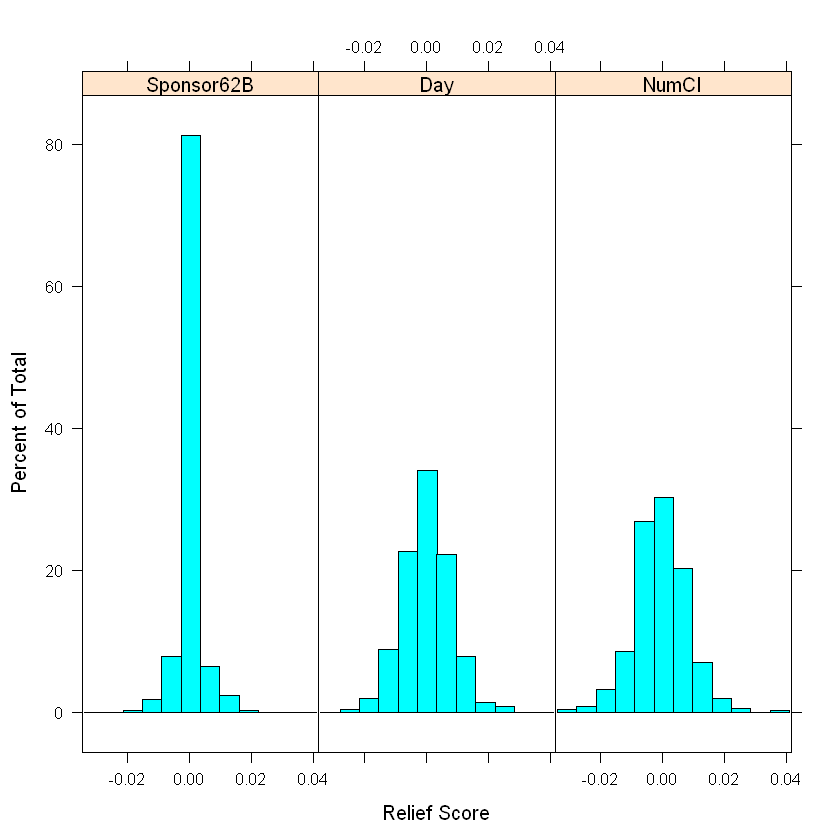

In [36]:
library(lattice)
histogram(~value|Predictor,
         data=permuted$permutations,
         xlim=extendrange(permuted$permutations$value),
         xlab="Relief Score",layout=c(3,1))